In [1]:
import pandas as pd

In [2]:
df =pd.read_csv(
    r'C:\Users\Eric\Desktop\ABUSHI\sales_data.csv'
)

In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
# Compute basic statistics for numerical columns
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [6]:
#Checking the columns of the dasasets
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [7]:
# Group by Region and Sales Representative and calculate the sum of Sales Amount
grouped_sales = df.groupby(['Region', 'Sales_Rep'])['Sales_Amount'].sum()

# Display the result
print(grouped_sales)

Region  Sales_Rep
East    Alice        260789.47
        Bob          309876.11
        Charlie      165172.94
        David        284613.51
        Eve          239340.90
North   Alice        249647.22
        Bob          233464.81
        Charlie      299789.01
        David        282539.27
        Eve          304172.20
South   Alice        239414.54
        Bob          251200.43
        Charlie      156140.68
        David        311416.99
        Eve          196078.22
West    Alice        215690.54
        Bob          286449.28
        Charlie      239708.85
        David        263167.59
        Eve          230592.67
Name: Sales_Amount, dtype: float64


In [8]:
# Group by Product Category and calculate the mean of Sales Amount
avg_sales_per_category = df.groupby('Product_Category')['Sales_Amount'].mean()

# Display the result
print(avg_sales_per_category)

Product_Category
Clothing       4901.023731
Electronics    5054.876585
Food           5317.582035
Furniture      4848.144962
Name: Sales_Amount, dtype: float64


In [9]:
# Group by Region and Sales Representative to see total sales amount
sales_by_region_rep = df.groupby(['Region', 'Sales_Rep'])['Sales_Amount'].sum().reset_index()

# Display the result
sales_by_region_rep.sort_values(by='Sales_Amount', ascending=False)

,Region,Sales_Rep,Sales_Amount
13,South,David,311416.99
1,East,Bob,309876.11
9,North,Eve,304172.20
7,North,Charlie,299789.01
16,West,Bob,286449.28
3,East,David,284613.51
8,North,David,282539.27
18,West,David,263167.59
0,East,Alice,260789.47
11,South,Bob,251200.43


In [12]:
import matplotlib.plyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.plyplot'

In [13]:
import matplotlib.pyplot as plt
print("matplotlib installed successfully")

Matplotlib is building the font cache; this may take a moment.


matplotlib installed successfully


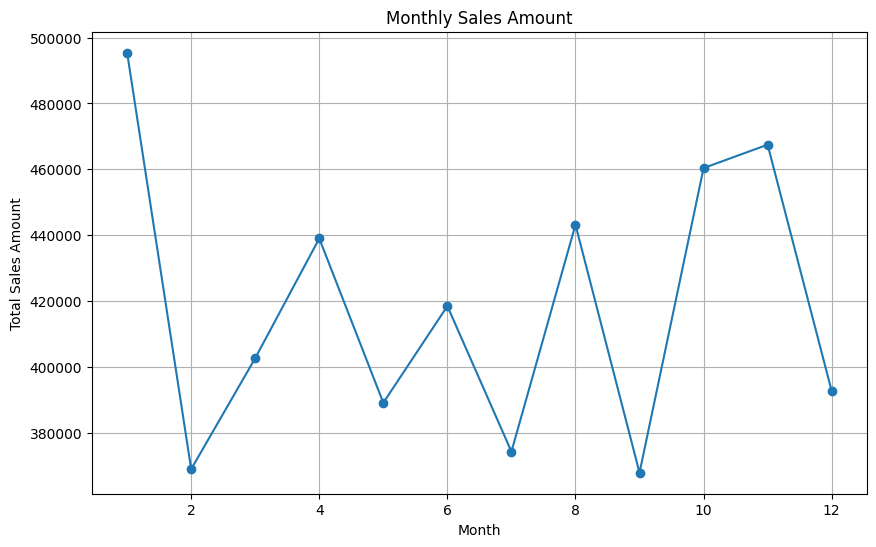

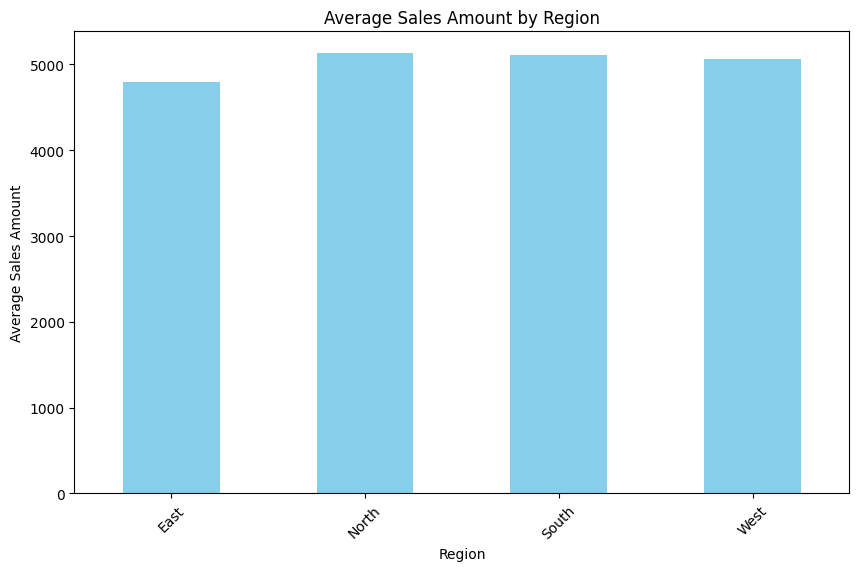

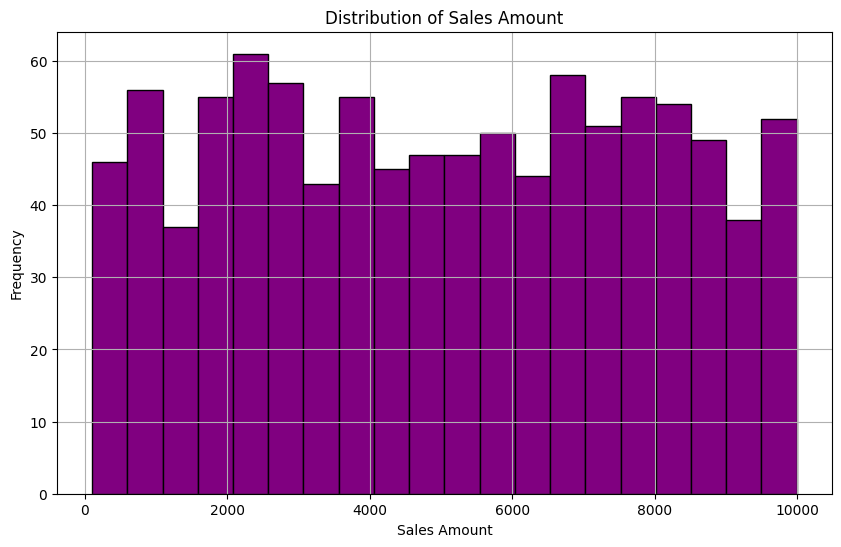

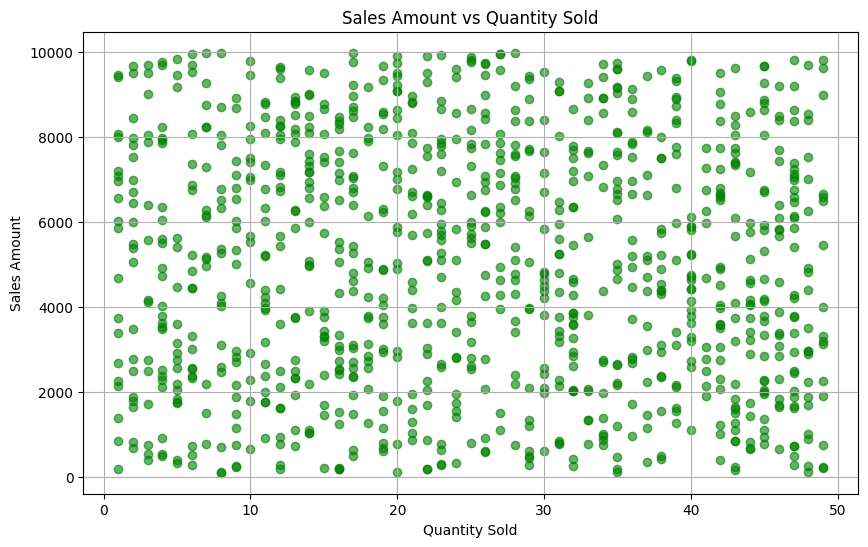

In [14]:
# 1. Line Chart: Showing Trends Over Time (Sales Data)
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month
monthly_sales = df.groupby('Month')['Sales_Amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

# 2. Bar Chart: Comparing Numerical Values Across Categories (Average Sales Amount by Region)
avg_sales_by_region = df.groupby('Region')['Sales_Amount'].mean()

plt.figure(figsize=(10, 6))
avg_sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Sales Amount by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.show()

# 3. Histogram: Distribution of Numerical Columns (Sales Amount)
plt.figure(figsize=(10, 6))
plt.hist(df['Sales_Amount'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. Scatter Plot: Relationship Between Two Numerical Columns (Sales Amount vs Quantity Sold)
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity_Sold'], df['Sales_Amount'], alpha=0.6, color='green')
plt.title('Sales Amount vs Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()